# Handwashing Discovery Analysis

<img src="https://i.imgur.com/gugIA5r.png" width=700>

### Introduction

Dr Ignaz Semmelweis was a Hungarian physician born in 1818 who worked in the Vienna General Hospital. In the past people thought of illness as caused by "bad air" or evil spirits. But in the 1800s Doctors started looking more at anatomy, doing autopsies and started making arguments based on data. Dr Semmelweis suspected that something was going wrong with the procedures at Vienna General Hospital. Semmelweis wanted to figure out why so many women in maternity wards were dying from childbed fever (i.e., [puerperal fever](https://en.wikipedia.org/wiki/Postpartum_infections)).



Analysis of the same data collected from 1841 to 1849.

### The Data Source

Dr Semmelweis published his research in 1861. Scanned pages of the [full text with the original tables in German](http://www.deutschestextarchiv.de/book/show/semmelweis_kindbettfieber_1861), but an excellent [English translation can be found here](http://graphics8.nytimes.com/images/blogs/freakonomics/pdf/the%20etiology,%20concept%20and%20prophylaxis%20of%20childbed%20fever.pdf).

In [3]:
# %pip install --upgrade plotly

In [2]:
from IPython.display import display, HTML
display(HTML("<style>.container { width:90% !important; }</style>"))

### Import Statements

In [3]:
import pandas as pd
import numpy as np
import plotly.express as px
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

### Notebook Presentation

In [4]:
pd.options.display.float_format = '{:,.2f}'.format

# Create locators for ticks on the time axis

from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

### Read the Data

In [16]:
df_yearly = pd.read_csv('annual_deaths_by_clinic.csv', parse_dates=["year"])
df_monthly = pd.read_csv('monthly_deaths.csv', parse_dates=['date'])

In [45]:
df_monthly['date'] = np.array(df_monthly['date'].dt.to_pydatetime())
df_yearly['year'] = np.array(df_yearly['year'].dt.to_pydatetime())

/var/folders/pv/s_ss5l0d0llch1w8tscp8wz80000gn/T/ipykernel_47414/3414743539.py:1: FutureWarning:

The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result

/var/folders/pv/s_ss5l0d0llch1w8tscp8wz80000gn/T/ipykernel_47414/3414743539.py:2: FutureWarning:

The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result



# Preliminary Data Exploration

* What is the shape of df_yearly and df_monthly? How many rows and columns?
* What are the column names?
* Which years are included in the dataset?
* Are there any NaN values or duplicates?
* What were the average number of births that took place per month?
* What were the average number of deaths that took place per month?

In [17]:
df_monthly.shape

(98, 3)

In [9]:
df_yearly.shape

(12, 4)

In [7]:
df_monthly.columns

Index(['date', 'births', 'deaths'], dtype='object')

In [8]:
df_yearly.columns

Index(['year', 'births', 'deaths', 'clinic'], dtype='object')

In [18]:
df_yearly.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12 entries, 0 to 11
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   year    12 non-null     datetime64[ns]
 1   births  12 non-null     int64         
 2   deaths  12 non-null     int64         
 3   clinic  12 non-null     object        
dtypes: datetime64[ns](1), int64(2), object(1)
memory usage: 516.0+ bytes


In [19]:
df_monthly.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 98 entries, 0 to 97
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   date    98 non-null     datetime64[ns]
 1   births  98 non-null     int64         
 2   deaths  98 non-null     int64         
dtypes: datetime64[ns](1), int64(2)
memory usage: 2.4 KB


### Check for Nan Values and Duplicates

In [10]:
df_yearly.duplicated().values.any()

False

In [11]:
df_yearly.isna().values.any()

False

In [12]:
df_monthly.duplicated().values.any()

False

In [13]:
df_monthly.isna().values.any()

False

### Descriptive Statistics

In [20]:
df_yearly.describe()

,year,births,deaths
count,12,12.00,12.00
mean,1843-07-02 20:00:00,"3,152.75",223.33
min,1841-01-01 00:00:00,"2,442.00",66.00
25%,1842-01-01 00:00:00,"2,901.75",100.25
50%,1843-07-02 12:00:00,"3,108.50",219.50
75%,1845-01-01 00:00:00,"3,338.25",263.50
max,1846-01-01 00:00:00,"4,010.00",518.00
std,NaN,449.08,145.38


In [21]:
df_monthly.describe()

,date,births,deaths
count,98,98.00,98.00
mean,1845-02-11 04:24:29.387755008,267.00,22.47
min,1841-01-01 00:00:00,190.00,0.00
25%,1843-02-08 00:00:00,242.50,8.00
50%,1845-02-15 00:00:00,264.00,16.50
75%,1847-02-22 00:00:00,292.75,36.75
max,1849-03-01 00:00:00,406.00,75.00
std,NaN,41.77,18.14


### Percentage of Women Dying in Childbirth

How dangerous was childbirth in the 1840s in Vienna? 

* Using the annual data, calculating the percentage of women giving birth who died throughout the 1840s at the hospital.


In comparison, the United States recorded 18.5 maternal deaths per 100,000 or 0.018% in 2013 [(source).](
https://en.wikipedia.org/wiki/Maternal_death#:~:text=The%20US%20has%20the%20%22highest,17.8%20per%20100%2C000%20in%202009)

In [22]:
df_yearly

,year,births,deaths,clinic
0,1841-01-01,3036,237,clinic 1
1,1842-01-01,3287,518,clinic 1
2,1843-01-01,3060,274,clinic 1
3,1844-01-01,3157,260,clinic 1
4,1845-01-01,3492,241,clinic 1
5,1846-01-01,4010,459,clinic 1
6,1841-01-01,2442,86,clinic 2
7,1842-01-01,2659,202,clinic 2
8,1843-01-01,2739,164,clinic 2
9,1844-01-01,2956,68,clinic 2


# Visualise the Total Number of Births 🤱 and Deaths 💀 over Time

### Ploting the Monthly Data on Twin Axes


* Formating the x-axis using locators for the years and months
* Setting the range on the x-axis so that the chart lines touch the y-axes
* Adding gridlines
* Do you notice anything in the late 1840s?

In [23]:
prob = df_yearly.deaths.sum() / df_yearly.births.sum() * 100
print(f'Chances of dying in the 1840s in Vienna: {prob:.3}%')

Chances of dying in the 1840s in Vienna: 7.08%


In [24]:
years = mdates.YearLocator()
months = mdates.MonthLocator()
years_fmt = mdates.DateFormatter('%Y')

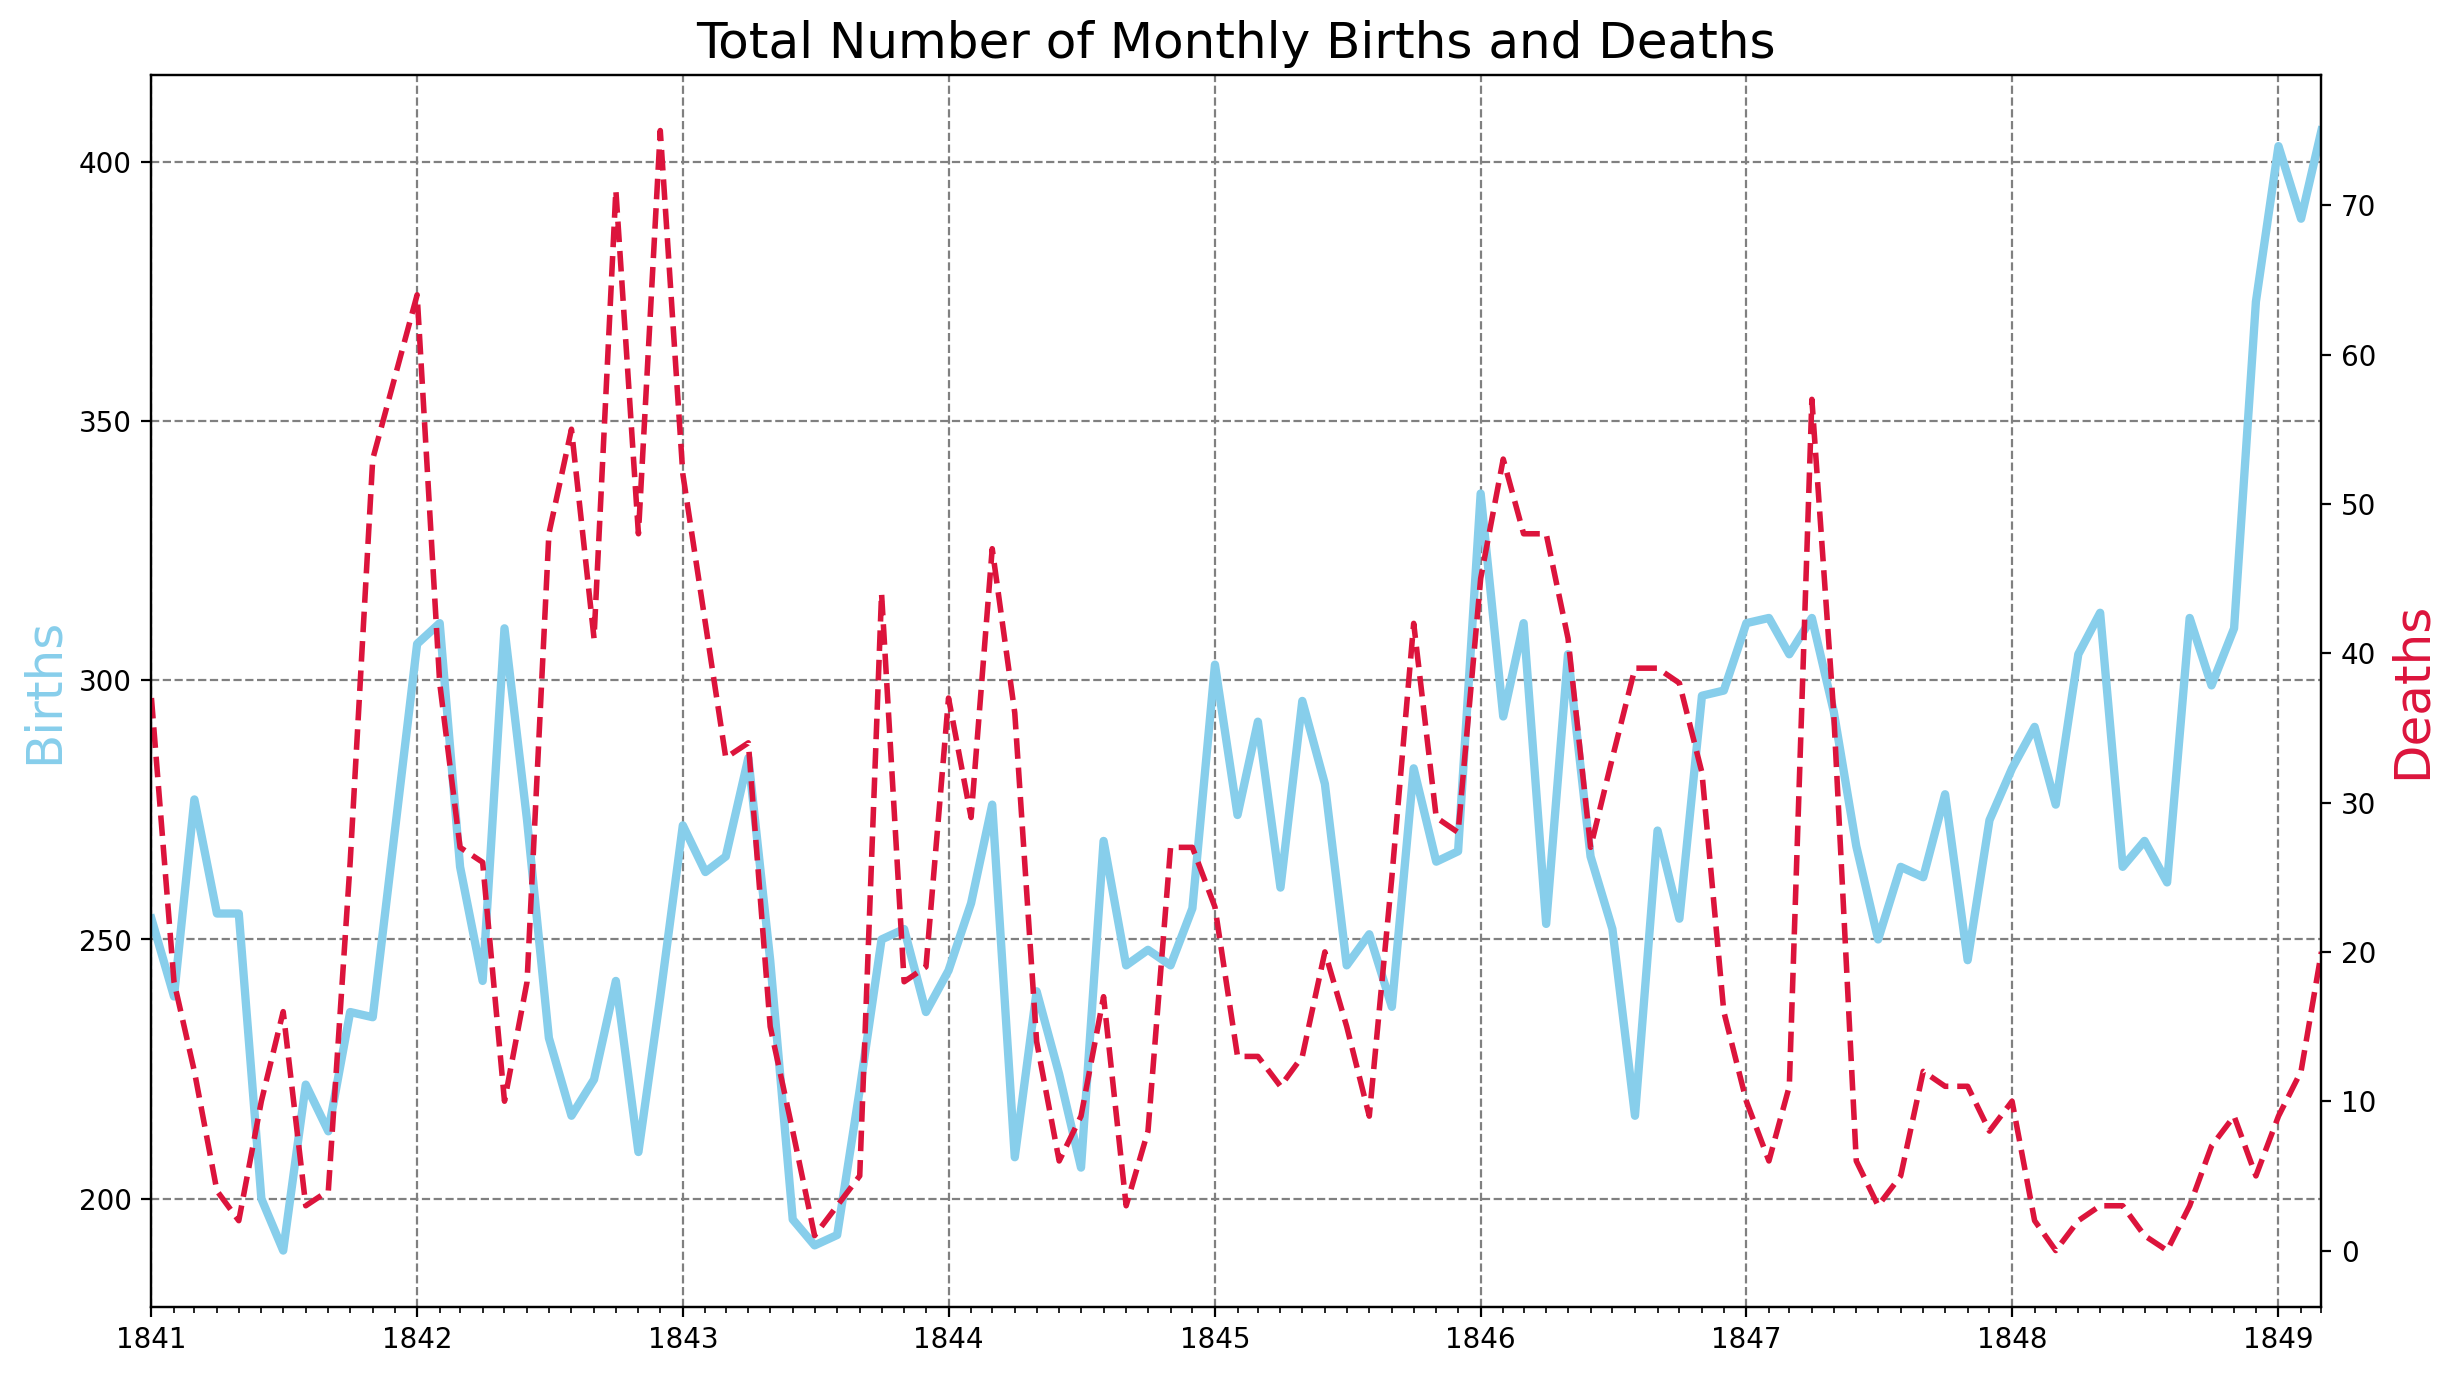

In [25]:
plt.figure(figsize=(14,8), dpi=200)
plt.title('Total Number of Monthly Births and Deaths', fontsize=18)
ax1 = plt.gca()
ax2 = ax1.twinx()

ax1.grid(color="grey", linestyle="--")

ax1.set_ylabel('Births', color='skyblue', fontsize=18)
ax2.set_ylabel('Deaths', color='crimson', fontsize=18)

ax1.set_xlim([df_monthly.date.min(), df_monthly.date.max()])
ax1.xaxis.set_major_locator(years)
ax1.xaxis.set_major_formatter(years_fmt)
ax1.xaxis.set_minor_locator(months)

ax1.plot(df_monthly.date, 
         df_monthly.births,
         color='skyblue', 
         linewidth=3)

ax2.plot(df_monthly.date,
         df_monthly.deaths,
         color='crimson', 
         linewidth=2, 
         linestyle='--')

plt.show()

# The Yearly Data Split by Clinic


Using plotly to create line charts of the births and deaths of the two different clinics at the Vienna General Hospital. 
* Which clinic is bigger or more busy judging by the number of births?
* Has the hospital had more patients over time? 
* What was the highest number of deaths recorded in clinic 1 and clinic 2?

## Yearly Births by Clinic

In [56]:
line = px.line(df_yearly,
               x="year",
               y="births",
               color="clinic",
               title="Proportion of Yearly Birthss by Clinic")

line.update_layout(
    plot_bgcolor='white',
    paper_bgcolor='white',
    title={
        'text': "Proportion of Yearly Birthss by Clinic",
        'x': 0.5,
        'xanchor': 'center'
    },
    xaxis=dict(
        title='Year',
        linecolor='black',
        showgrid=True,
        gridcolor='lightgrey'
    ),
    yaxis=dict(
        title='Proportion of Deaths',
        linecolor='black',
        showgrid=True,
        gridcolor='lightgrey'
    ),
    legend=dict(
        title='Clinic',
        x=0.05,
        y=1.0
    ),
    font=dict(
        family="Arial",
        size=12,
        color="black"
    )
)

line.show()

/Users/milan91/anaconda3/lib/python3.11/site-packages/_plotly_utils/basevalidators.py:106: FutureWarning:

The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result



## Yearly Deaths by Clinic

In [54]:
line = px.line(df_yearly,
               x="year",
               y="deaths",
               color="clinic",
               title="Proportion of Yearly Deaths by Clinic")

line.update_layout(
    plot_bgcolor='white',
    paper_bgcolor='white',
    title={
        'text': "Proportion of Yearly Deaths by Clinic",
        'x': 0.5,
        'xanchor': 'center'
    },
    xaxis=dict(
        title='Year',
        linecolor='black',
        showgrid=True,
        gridcolor='lightgrey'
    ),
    yaxis=dict(
        title='Proportion of Deaths',
        linecolor='black',
        showgrid=True,
        gridcolor='lightgrey'
    ),
    legend=dict(
        title='Clinic',
        x=0.05,
        y=1.0
    ),
    font=dict(
        family="Arial",
        size=12,
        color="black"
    )
)

line.show()

/Users/milan91/anaconda3/lib/python3.11/site-packages/_plotly_utils/basevalidators.py:106: FutureWarning:

The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result



## Calculate the Proportion of Deaths at Each Clinic

**Challenge**: Calculate the proportion of maternal deaths per clinic. That way we can compare like with like. 
* Work out the percentage of deaths for each row in the `df_yearly` DataFrame by adding a column called "pct_deaths". 
* Calculate the average maternal death rate for clinic 1 and clinic 2 (i.e., the total number of deaths per the total number of births).
* Create another plotly line chart to see how the percentage varies year over year with the two different clinics.
* Which clinic has a higher proportion of deaths?
* What is the highest monthly death rate in clinic 1 compared to clinic 2?

In [48]:
df_yearly["pct_deaths"] = df_yearly["deaths"] / df_yearly["births"]

In [49]:
clinic_1 = df_yearly[df_yearly.clinic == 'clinic 1']
avg_c1 = clinic_1.deaths.sum() / clinic_1.births.sum() * 100
print(f'Average death rate in clinic 1 is {avg_c1:.3}%.')

Average death rate in clinic 1 is 9.92%.


In [50]:
clinic_2 = df_yearly[df_yearly.clinic == 'clinic 2']
avg_c2 = clinic_2.deaths.sum() / clinic_2.births.sum() * 100
print(f'Average death rate in clinic 2 is {avg_c2:.3}%.')

Average death rate in clinic 2 is 3.88%.


## Plotting the Proportion of Yearly Deaths by Clinic

In [55]:
line = px.line(df_yearly,
               x="year",
               y="pct_deaths",
               color="clinic",
               title="Proportion of Yearly Deaths Percentage by Clinic")

line.update_layout(
    plot_bgcolor='white',
    paper_bgcolor='white',
    title={
        'text': "Proportion of Yearly Deaths by Clinic",
        'x': 0.5,
        'xanchor': 'center'
    },
    xaxis=dict(
        title='Year',
        linecolor='black',
        showgrid=True,
        gridcolor='lightgrey'
    ),
    yaxis=dict(
        title='Proportion of Deaths',
        linecolor='black',
        showgrid=True,
        gridcolor='lightgrey'
    ),
    legend=dict(
        title='Clinic',
        x=0.05,
        y=1.0
    ),
    font=dict(
        family="Arial",
        size=12,
        color="black"
    )
)

line.show()

/Users/milan91/anaconda3/lib/python3.11/site-packages/_plotly_utils/basevalidators.py:106: FutureWarning:

The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result



## The Effect of Handwashing

Dr Semmelweis made handwashing obligatory in the summer of 1947. He ordered people to wash their hands with clorine (instead of water).

In [57]:
# Date when handwashing was made mandatory
handwashing_start = pd.to_datetime('1847-06-01')

### Creating two subsets from the `df_monthly` data: before and after Dr Semmelweis ordered washing hand.
### Calculating the average death rate prior to June 1947.
### Calculating the average death rate after June 1947.

In [58]:
df_monthly["pct_deaths"] = df_monthly["deaths"] / df_monthly["births"]

In [59]:
before_washing = df_monthly[df_monthly.date < handwashing_start]
after_washing = df_monthly[df_monthly.date >= handwashing_start]

In [62]:
before_washing

,date,births,deaths,pct_deaths
0,1841-01-01,254,37,0.15
1,1841-02-01,239,18,0.08
2,1841-03-01,277,12,0.04
3,1841-04-01,255,4,0.02
4,1841-05-01,255,2,0.01
...,...,...,...,...
71,1847-01-01,311,10,0.03
72,1847-02-01,312,6,0.02
73,1847-03-01,305,11,0.04
74,1847-04-01,312,57,0.18


In [63]:
bw_rate = before_washing.deaths.sum() / before_washing.births.sum() * 100
aw_rate = after_washing.deaths.sum() / after_washing.births.sum() * 100
print(f'Average death rate before 1847 was {bw_rate:.4}%')
print(f'Average death rate AFTER 1847 was {aw_rate:.3}%')

Average death rate before 1847 was 10.53%
Average death rate AFTER 1847 was 2.15%


## Calculating a Rolling Average of the Death Rate

Creating a DataFrame that has the 6 month rolling average death rate prior to mandatory handwashing.

In [64]:
roll_df = before_washing.set_index('date')
roll_df = roll_df.rolling(window=6).mean()

In [68]:
roll_df

,births,deaths,pct_deaths
date,,,
1841-01-01,NaN,NaN,NaN
1841-02-01,NaN,NaN,NaN
1841-03-01,NaN,NaN,NaN
1841-04-01,NaN,NaN,NaN
1841-05-01,NaN,NaN,NaN
...,...,...,...
1847-01-01,274.50,29.00,0.11
1847-02-01,290.50,23.50,0.08
1847-03-01,296.17,18.83,0.07


## Death rate before and after handwashing, and the 6-month moving average before handwashing

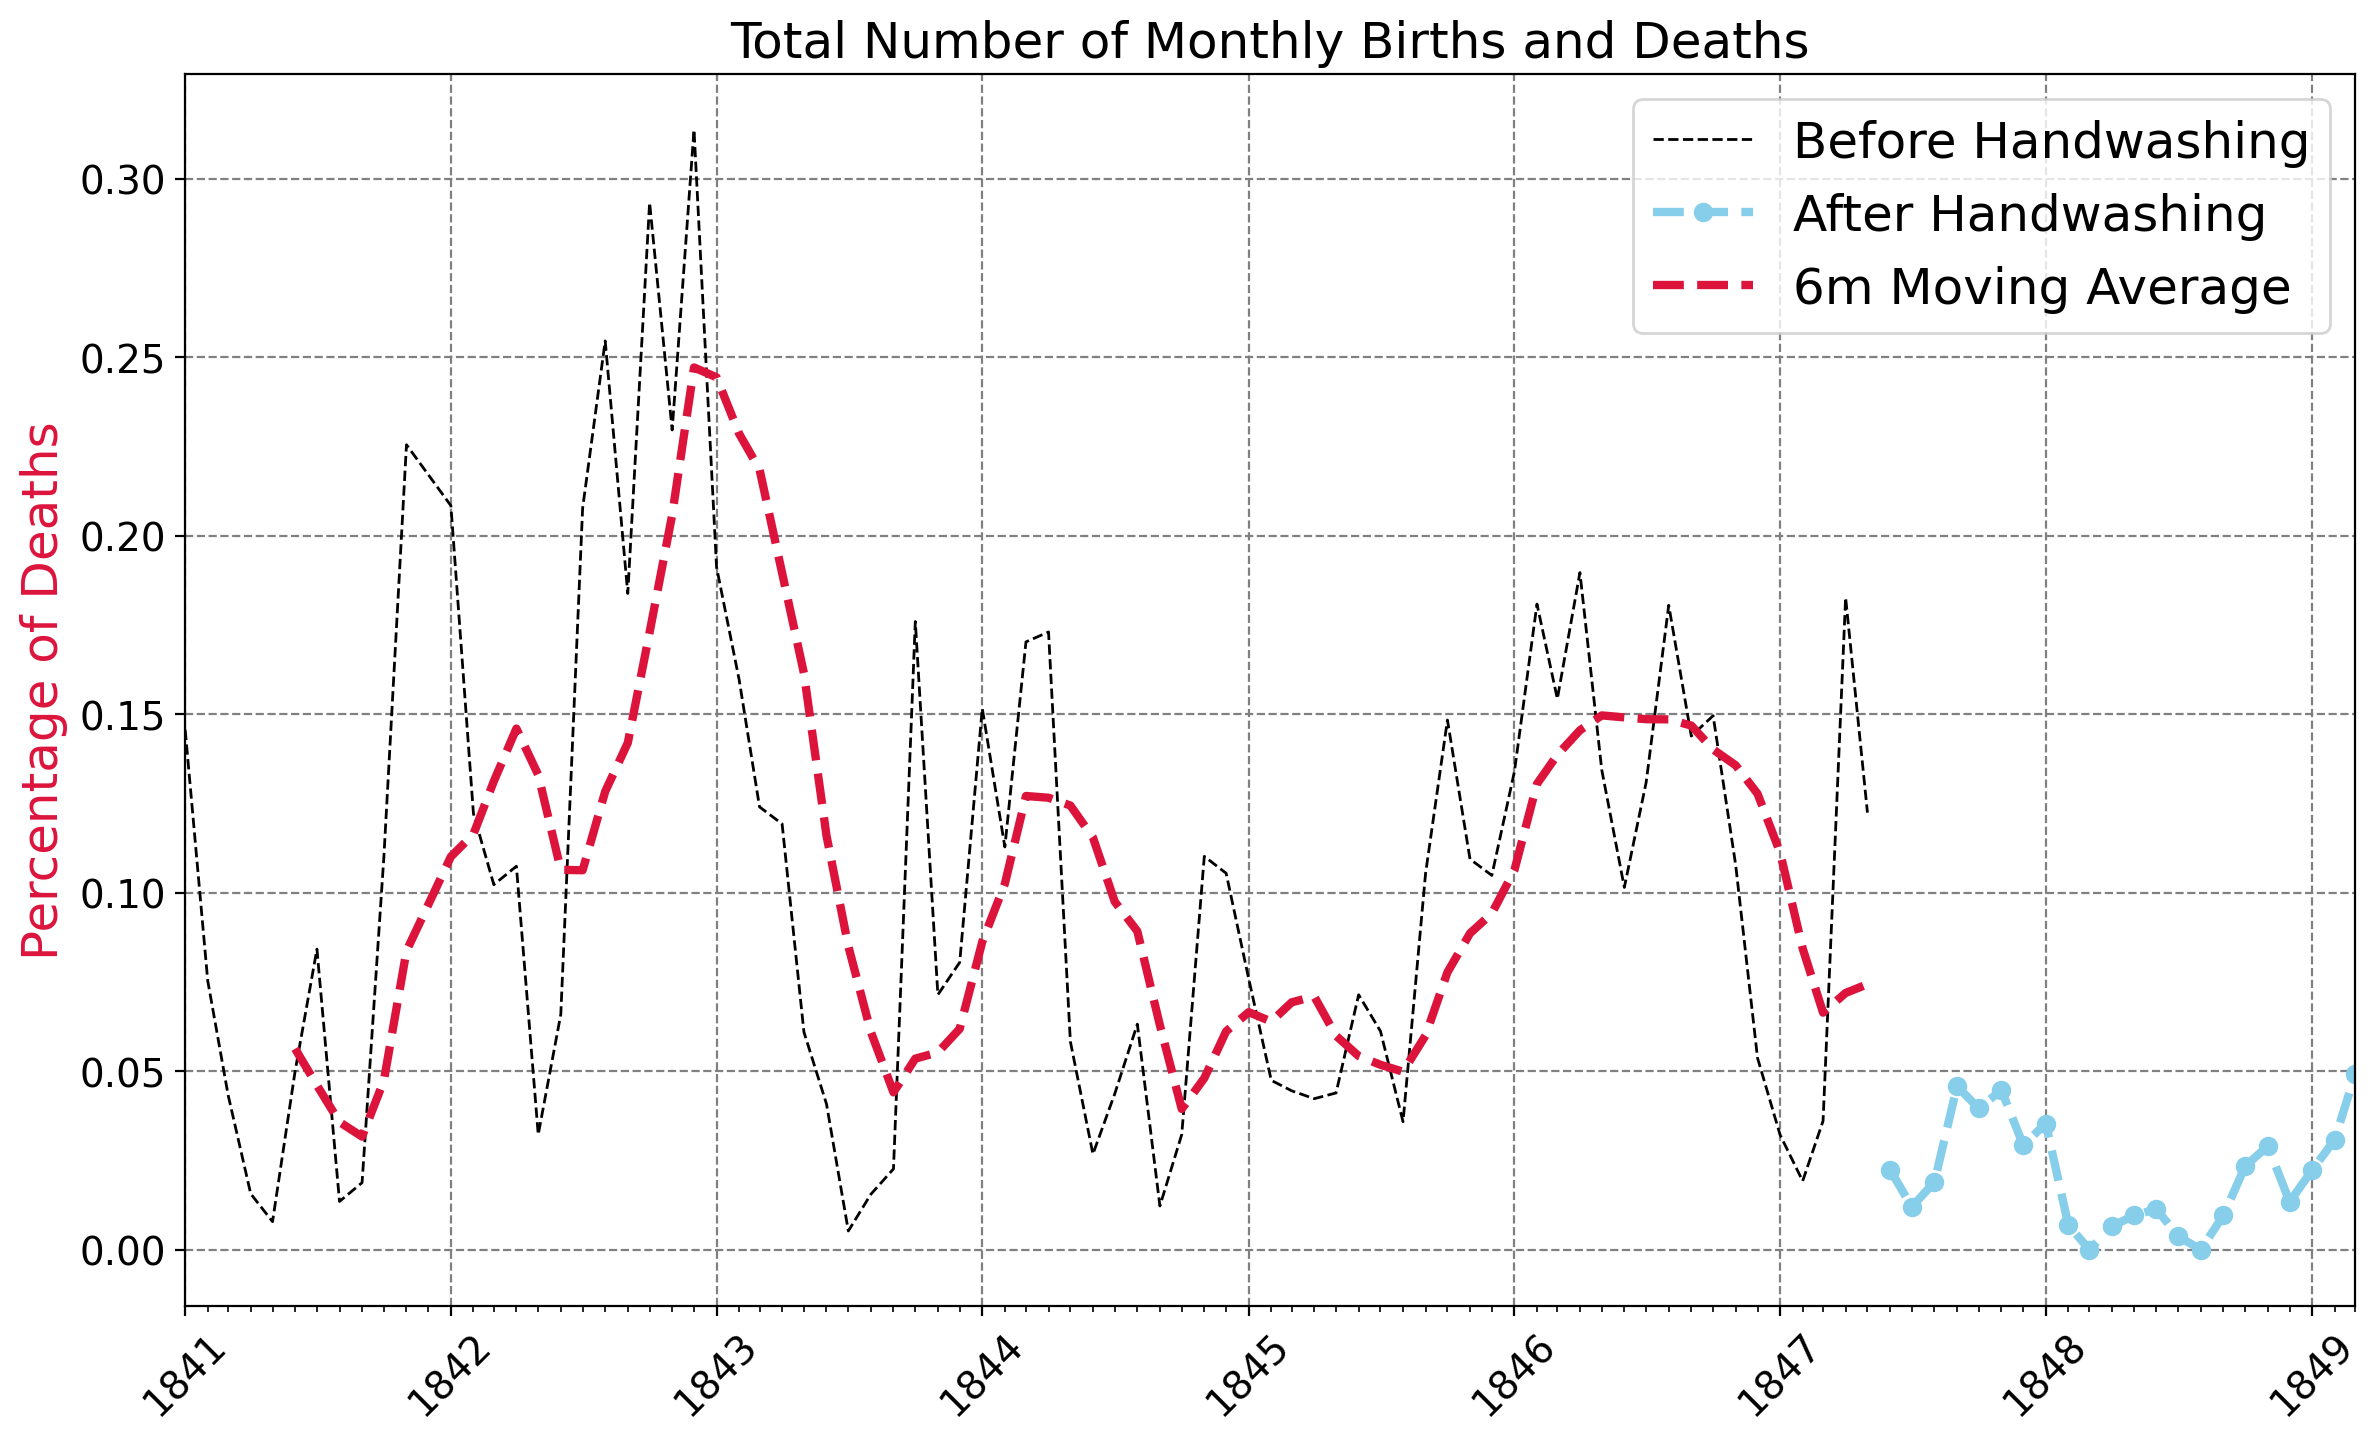

In [69]:
plt.figure(figsize=(14,8), dpi=200)
plt.title('Total Number of Monthly Births and Deaths', fontsize=18)

plt.yticks(fontsize=14)
plt.xticks(fontsize=14, rotation=45)
plt.ylabel('Percentage of Deaths', color='crimson', fontsize=18)

ax = plt.gca()
ax.xaxis.set_major_locator(years)
ax.xaxis.set_major_formatter(years_fmt)
ax.xaxis.set_minor_locator(months)
ax.set_xlim([df_monthly.date.min(), df_monthly.date.max()])

plt.grid(color='grey', linestyle='--')

bw_line = plt.plot(before_washing.date, 
                   before_washing.pct_deaths,
                   color='black', 
                   linewidth=1,
                   linestyle="dashed",
                   label='Before Handwashing')

aw_line = plt.plot(after_washing.date,
                   after_washing.pct_deaths,
                   color='skyblue', 
                   linewidth=3, 
                   linestyle='--',
                   label='After Handwashing',
                   marker="o")

ma_line = plt.plot(roll_df.index,
                   roll_df.pct_deaths,
                   color='crimson', 
                   linewidth=3, 
                   linestyle='--',
                   label='6m Moving Average')

plt.legend(fontsize=18)

plt.show()

## Calculating the Difference in the Average Monthly Death Rate

* What was the average percentage of monthly deaths before handwashing? 
* What was the average percentage of monthly deaths after handwashing was made obligatory?
* By how much did handwashing reduce the average chance of dying in childbirth in percentage terms?
* How do these numbers compare to the average for all the 1840s that we calculated earlier? 
* How many times lower are the chances of dying after handwashing compared to before?

In [72]:
avg_prob_before = before_washing.pct_deaths.mean() * 100
print(f'Chance of death during childbirth before handwashing: {avg_prob_before:.3}%.')

avg_prob_after = after_washing.pct_deaths.mean() * 100
print(f'Chance of death during childbirth after handwashing: {avg_prob_after:.3}%.')

mean_diff = avg_prob_before - avg_prob_after
print(f'Handwashing reduced the monthly proportion of deaths by {mean_diff:.3}%!')

times = avg_prob_before / avg_prob_after
print(f'This is a {times:.2}x improvement!')

Chance of death during childbirth before handwashing: 10.5%.
Chance of death during childbirth after handwashing: 2.11%.
Handwashing reduced the monthly proportion of deaths by 8.4%!
This is a 5.0x improvement!


## Using Box Plots to Show How the Death Rate Changed Before and After Handwashing

In [73]:
df_monthly['washing_hands'] = np.where(df_monthly.date < handwashing_start, 'No', 'Yes')
df_monthly

,date,births,deaths,pct_deaths,washing_hands
0,1841-01-01,254,37,0.15,No
1,1841-02-01,239,18,0.08,No
2,1841-03-01,277,12,0.04,No
3,1841-04-01,255,4,0.02,No
4,1841-05-01,255,2,0.01,No
...,...,...,...,...,...
93,1848-11-01,310,9,0.03,Yes
94,1848-12-01,373,5,0.01,Yes
95,1849-01-01,403,9,0.02,Yes
96,1849-02-01,389,12,0.03,Yes


In [80]:
box = px.box(df_monthly, 
             x='washing_hands', 
             y='pct_deaths',
             color='washing_hands',
             title='How Have the Stats Changed with Handwashing?')

box.update_layout(
                  legend_title_text="Washing Hands",
                  plot_bgcolor='white',
                  paper_bgcolor='white',
                  title={'text': "How Have the Stats Changed with Handwashing",
                         'x': 0.5,
                         'xanchor': 'center'},
                  xaxis=dict(
                      title='Washing Hands',
                      linecolor='black',
                      showgrid=True,
                      gridcolor='lightgrey'),
                  yaxis=dict(
                      title='Percentage of Monthly Deaths',
                      linecolor='black',
                      showgrid=True,
                      gridcolor='lightgrey'))

box.show()

## Using Histograms to Visualise the Monthly Distribution of Outcomes

In [93]:
hist = px.histogram(df_monthly, 
                    x='pct_deaths', 
                    color='washing_hands',
                    nbins=20,
                    opacity=0.7,
                    barmode='overlay',
                    histnorm='percent',
                    marginal='box',)

hist.update_layout(legend_title_text="Washing Hands",
                   plot_bgcolor='white',
                   paper_bgcolor='white',
                   title={'text': "Monthly Percentage of Deaths",
                         'x': 0.5,
                         'xanchor': 'center'},
                   xaxis=dict(
                      title='Proportion of Monthly Deaths',
                      linecolor='black',
                      showgrid=True,
                      gridcolor='lightgrey'),
                   yaxis=dict(
                      title='Count',
                      linecolor='black',
                      showgrid=True,
                      gridcolor='lightgrey'))

hist.show()

## Using a Kernel Density Estimate (KDE) to visualise a smooth distribution

/Users/milan91/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

/Users/milan91/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.



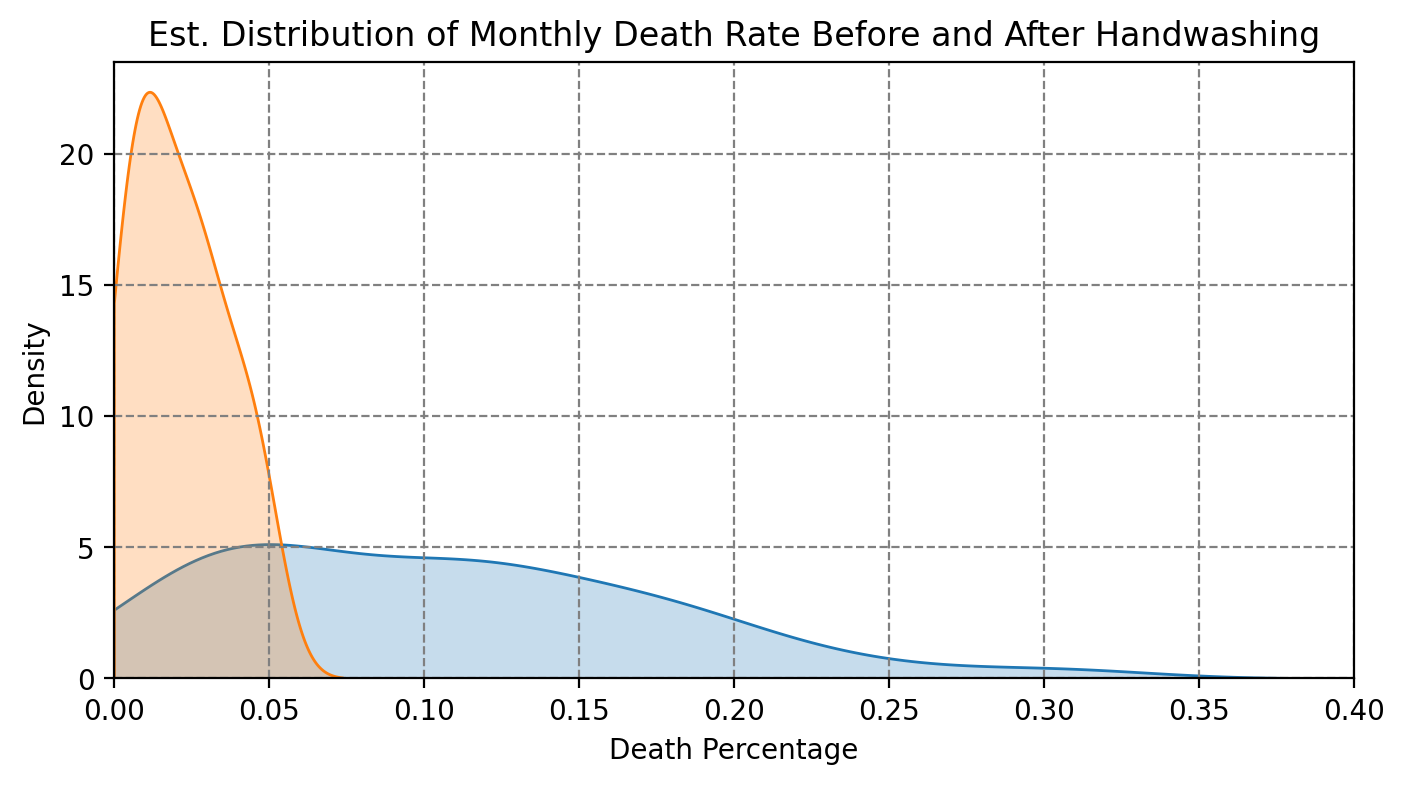

In [96]:
plt.figure(figsize=(8,4),dpi=200)

plt.grid(color='grey', linestyle='--')
sns.kdeplot(before_washing.pct_deaths, fill=True, clip=(0,1))
sns.kdeplot(after_washing.pct_deaths, fill=True, clip=(0,1))
plt.title('Est. Distribution of Monthly Death Rate Before and After Handwashing')
plt.xlabel("Death Percentage")
plt.xlim(0, 0.40)

plt.show()

### Using a T-Test to Show Statistical Significance

If the p-value is less than 1% then we can be 99% certain that handwashing has made a difference to the average monthly death rate. 

In [97]:
import scipy.stats as stats

In [98]:
t_stat, p_value = stats.ttest_ind(a=before_washing.pct_deaths, 
                                  b=after_washing.pct_deaths)
print(f'p-palue is {p_value:.10f}')
print(f't-statstic is {t_stat:.4}')

p-palue is 0.0000002985
t-statstic is 5.512




<img src=https://i.imgur.com/rvjNVzQ.gif>